In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("activities_cleaned 1.csv") 

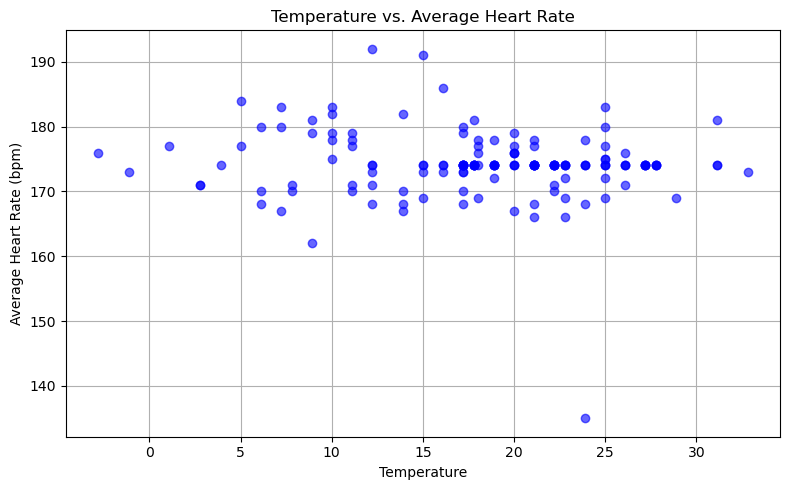

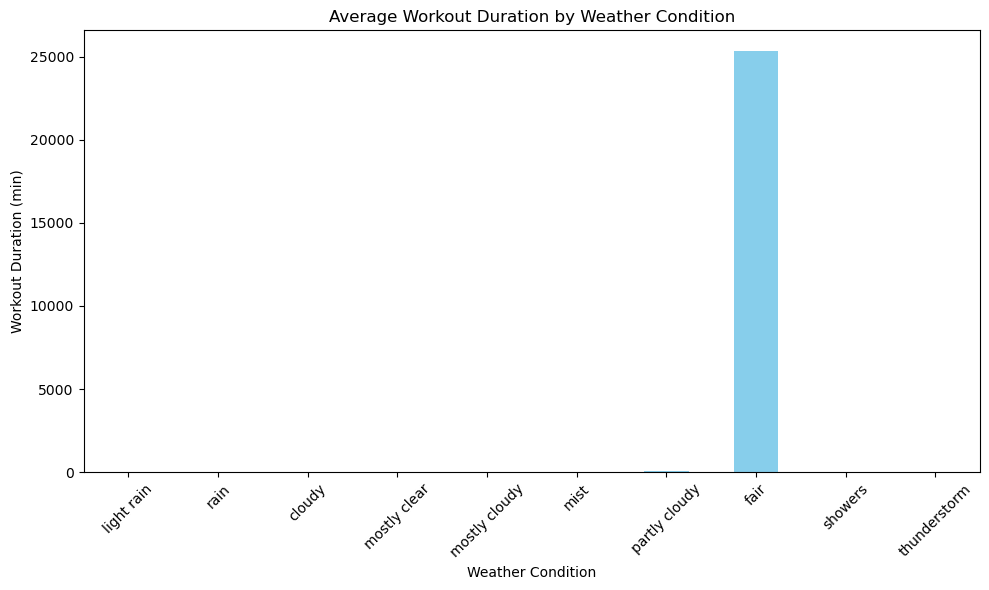

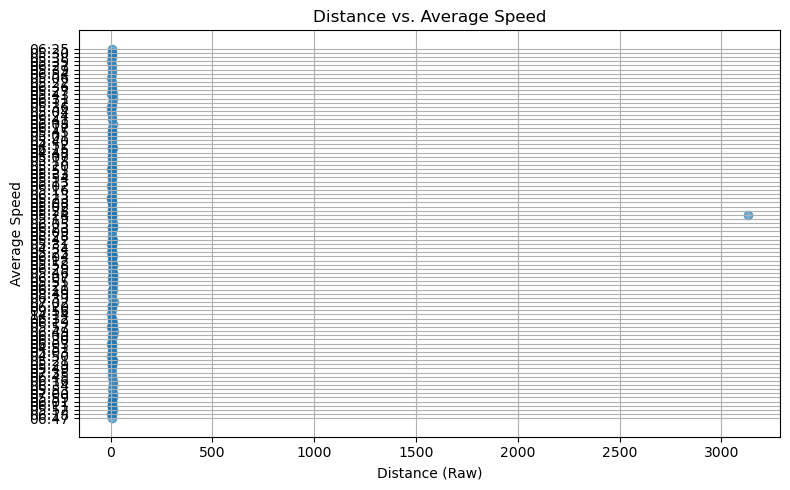

C:\Users\SARDAR\AppData\Local\Temp\ipykernel_9376\642861116.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_avg = df.groupby('Wind Speed Bin')['Workout Duration (min)'].mean()


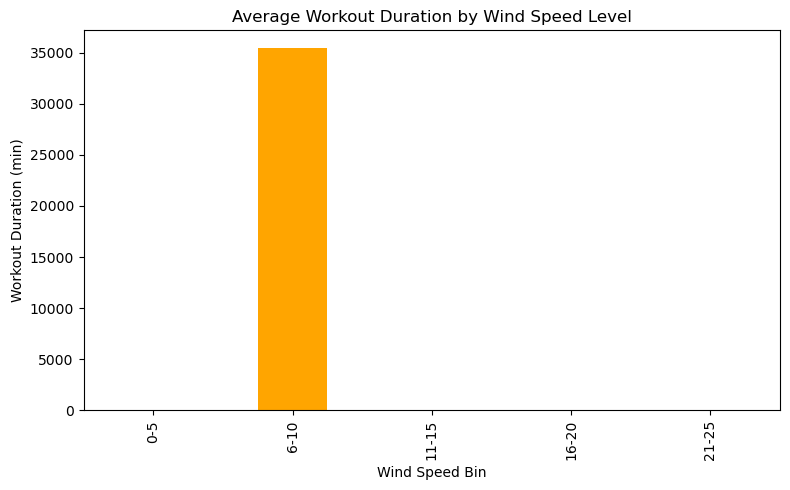

In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# If not done yet: convert timestamps and compute workout duration
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'], errors='coerce')
df['End Timestamp'] = pd.to_datetime(df['End Timestamp'], errors='coerce')
df['Workout Duration (min)'] = (df['End Timestamp'] - df['Begin Timestamp']).dt.total_seconds() / 60

# 1. Line Chart: Temperature vs. Average Heart Rate
plt.figure(figsize=(8, 5))
plt.plot(df['Temperature (Raw)'], df['Average Heart Rate (bpm)'], 'bo', alpha=0.6)
plt.title("Temperature vs. Average Heart Rate")
plt.xlabel("Temperature")
plt.ylabel("Average Heart Rate (bpm)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bar Chart: Average Workout Duration per Weather Condition
weather_avg = df.groupby('Condition')['Workout Duration (min)'].mean().sort_values()
plt.figure(figsize=(10, 6))
weather_avg.plot(kind='bar', color='skyblue')
plt.title("Average Workout Duration by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Workout Duration (min)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Scatter Plot: Distance vs. Average Speed
plt.figure(figsize=(8, 5))
plt.scatter(df['Distance (Raw)'], df['Average Speed'], alpha=0.6)
plt.title("Distance vs. Average Speed")
plt.xlabel("Distance (Raw)")
plt.ylabel("Average Speed")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Grouped Bar Chart: Wind Speed Binned vs. Avg Workout Duration
# First, bin wind speeds
df['Wind Speed Bin'] = pd.cut(df['Wind Speed (Raw)'], bins=[0, 5, 10, 15, 20, 25], labels=['0-5', '6-10', '11-15', '16-20', '21-25'])
wind_avg = df.groupby('Wind Speed Bin')['Workout Duration (min)'].mean()

plt.figure(figsize=(8, 5))
wind_avg.plot(kind='bar', color='orange')
plt.title("Average Workout Duration by Wind Speed Level")
plt.xlabel("Wind Speed Bin")
plt.ylabel("Workout Duration (min)")
plt.tight_layout()
plt.show()


In [14]:
# week9
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [16]:
df['Calories'] = df['Calories'].astype(str).str.replace(',', '').astype(float)
df['Distance (Raw)'] = df['Distance (Raw)'].astype(str).str.replace(',', '').astype(float)
df['Wind Speed (Raw)'] = df['Wind Speed (Raw)'].astype(str).str.replace(',', '').astype(float)
df['Temperature (Raw)'] = df['Temperature (Raw)'].astype(str).str.replace(',', '').astype(float)
df['Workout Duration (min)'] = df['Workout Duration (min)'].astype(str).str.replace(',', '').astype(float)


In [17]:
df['Calories'].unique()


array([ 753.,  626.,  619.,  941.,  668.,  573.,  464., 1263.,  542.,
        833.,  405.,  596.,  435.,  411.,  806.,  508.,  438.,  623.,
        256.,  771.,  679.,  834.,  381.,  350.,  409.,  370.,  557.,
        351.,  653.,  345.,  372.,  253.,  340.,  710., 1199.,  386.,
        567.,  396.,  562.,  441.,  956.,  387.,  576.,  804.,  415.,
        417.,  395.,  589.,  281.,  408.,  421.,  285.,  428.,  420.,
        308.])

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)



R² Score: 0.9463968379588773
RMSE: 4.1796879848925395


This week, I focused on building and evaluating a linear regression model to predict workout duration based on selected features, including temperature, wind speed, distance, and calories burned. I started by cleaning the dataset, ensuring numerical columns were correctly converted to float types. After preprocessing, I split the data into training and testing sets using an 80-20 split and trained a linear regression model. The model achieved a high R² score of approximately 0.946, indicating strong predictive power. I also computed the RMSE (Root Mean Squared Error) to quantify the average prediction error, which was around 4.18 minutes.